In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, \
    classification_report, precision_score,recall_score, \
    f1_score



In [ ]:
# Load the dataset
data = pd.read_csv('/content/problem2.csv')

In [ ]:
data.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [ ]:
data.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [ ]:
data = data.loc[(data != '-').all(axis=1)]

In [ ]:
# Check for missing values
print(data.isnull().sum())

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64


In [ ]:
# Data Preparation:
# Handle missing values
data["weight"] = data["weight"].fillna(data["weight"].mean())

<ipython-input-8-0c7d14393259>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["weight"] = data["weight"].fillna(data["weight"].mean())


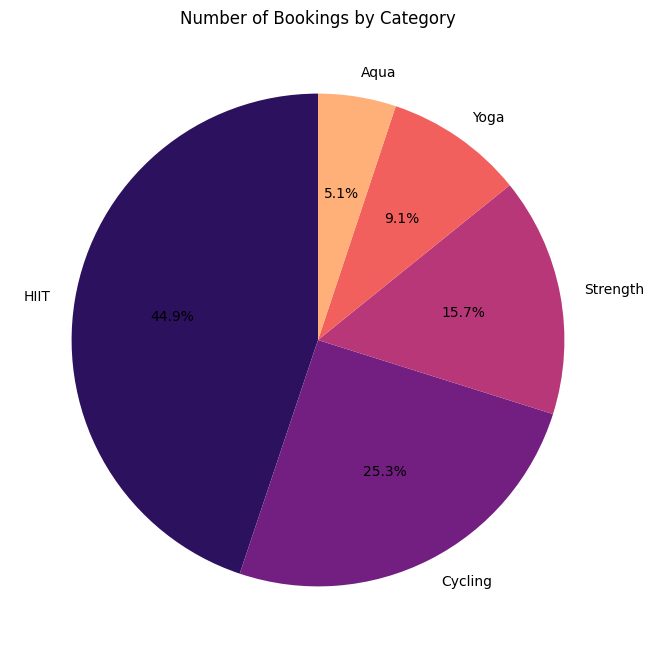

In [ ]:
plt.figure(figsize=(8, 8))
data['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('magma', len(data['category'].unique())))
plt.ylabel('')  # Hide the y-label as it's usually not needed
plt.title('Number of Bookings by Category')
plt.show()

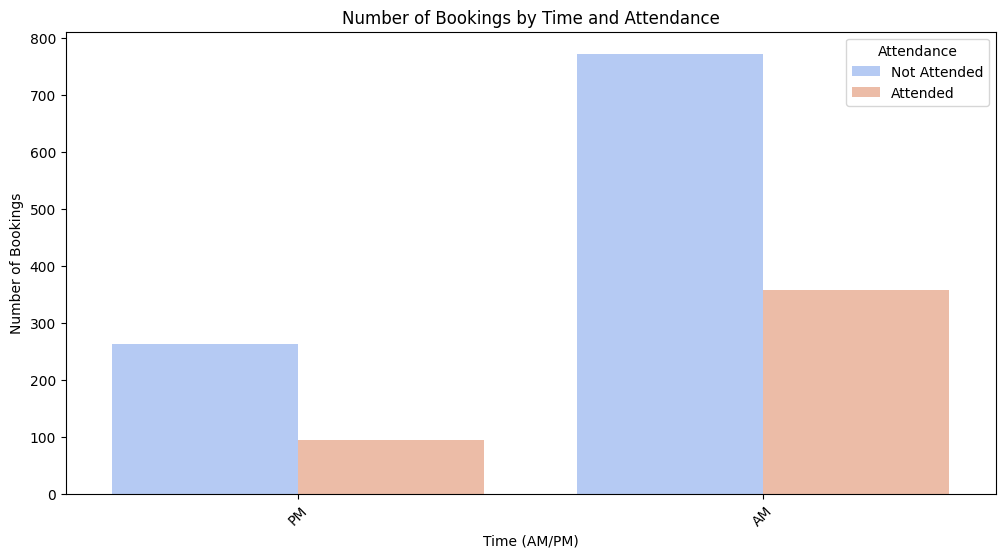

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='time', hue='attended', palette='coolwarm')  # Example using 'coolwarm' palette
plt.xlabel('Time (AM/PM)')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by Time and Attendance')
plt.legend(title='Attendance', labels=['Not Attended', 'Attended'])
plt.xticks(rotation=45)
plt.show()


In [ ]:
for col in data.columns:
    unique_values = data[col].unique()
    print(f"{col}: {unique_values}")

booking_id: [   1    2    3 ... 1498 1499 1500]
months_as_member: [ 17  10  16   5  15   7  11   9  23  13   8  22   6  33  24  14   2  12
  26  28  27   1   3  21  18  19  53  20  34  25  32  73  55   4  35  54
  76  62  42 105  90  29  60  30 107  52  37  38  48  51  40  89  57  36
  44  39  41  47  58  66  45  43  61  50  65  31  97  59  93 148 111  69]
weight: [79.56 79.01 74.53 ... 87.38 68.64 94.39]
days_before: ['8' '2' '14' '10' '6' '4' '9' '12' '5' '3' '7' '13' '12 days' '20' '1'
 '15' '6 days' '11' '13 days' '3 days' '16' '1 days' '7 days' '8 days'
 '10 days' '14 days' '17' '5 days' '2 days' '4 days' '29']
day_of_week: ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']
time: ['PM' 'AM']
category: ['Strength' 'HIIT' 'Cycling' 'Yoga' 'Aqua']
attended: [0 1]


In [ ]:
# Remove "days" from entries in the 'days_before' column and convert to numeric type
data['days_before'] = pd.to_numeric(data['days_before'].str.replace(' days', ''), errors='coerce')

In [ ]:
# Replace values in the 'day_of_week' column
data['day_of_week'] = data['day_of_week'].replace({'Wednesday': 'Wed', 'Fri.': 'Fri', 'Monday': 'Mon'})

<ipython-input-14-e480419ea543>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='day_of_week', palette='Set2')  # Example using 'Set2' palette


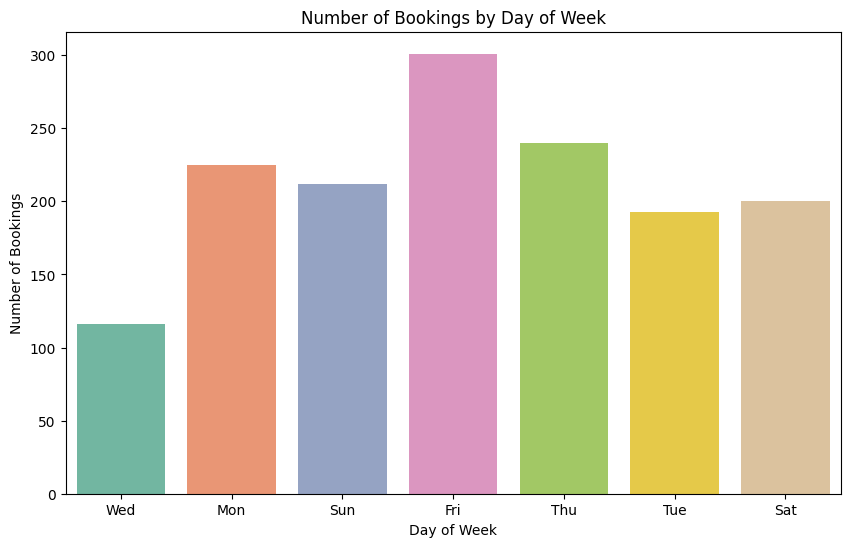

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='day_of_week', palette='Set2')  # Example using 'Set2' palette
plt.xlabel('Day of Week')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by Day of Week')
plt.show()

In [ ]:
for col in data.columns:
    unique_values = data[col].unique()
    print(f"{col}: {unique_values}")

booking_id: [   1    2    3 ... 1498 1499 1500]
months_as_member: [ 17  10  16   5  15   7  11   9  23  13   8  22   6  33  24  14   2  12
  26  28  27   1   3  21  18  19  53  20  34  25  32  73  55   4  35  54
  76  62  42 105  90  29  60  30 107  52  37  38  48  51  40  89  57  36
  44  39  41  47  58  66  45  43  61  50  65  31  97  59  93 148 111  69]
weight: [79.56 79.01 74.53 ... 87.38 68.64 94.39]
days_before: [ 8  2 14 10  6  4  9 12  5  3  7 13 20  1 15 11 16 17 29]
day_of_week: ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']
time: ['PM' 'AM']
category: ['Strength' 'HIIT' 'Cycling' 'Yoga' 'Aqua']
attended: [0 1]


In [ ]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['day_of_week', 'time', 'category'])

# Drop the original categorical columns
data_encoded.drop(['booking_id'], axis=1, inplace=True)  # assuming booking_id is not relevant for prediction

# Display the encoded data
data_encoded.head()

,months_as_member,weight,days_before,attended,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_AM,time_PM,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Yoga
0,17,79.56,8,0,False,False,False,False,False,False,True,False,True,False,False,False,True,False
1,10,79.01,2,0,False,True,False,False,False,False,False,True,False,False,False,True,False,False
2,16,74.53,14,0,False,False,False,True,False,False,False,True,False,False,False,False,True,False
3,5,86.12,10,0,True,False,False,False,False,False,False,True,False,False,True,False,False,False
4,15,69.29,8,0,False,False,False,False,True,False,False,True,False,False,False,True,False,False


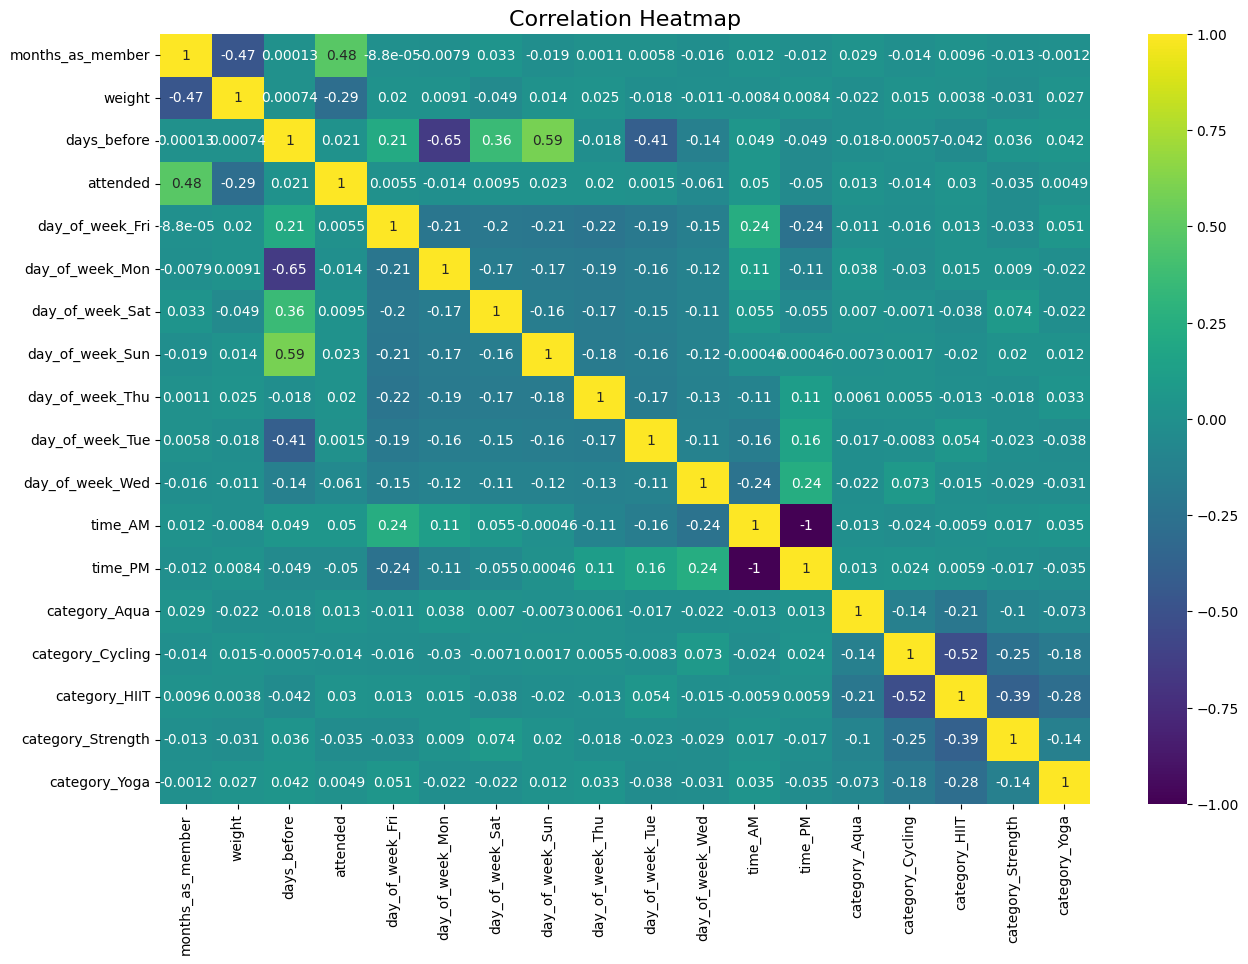

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data_encoded.corr(), annot=True, cmap="viridis")  # Changed to 'viridis'
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

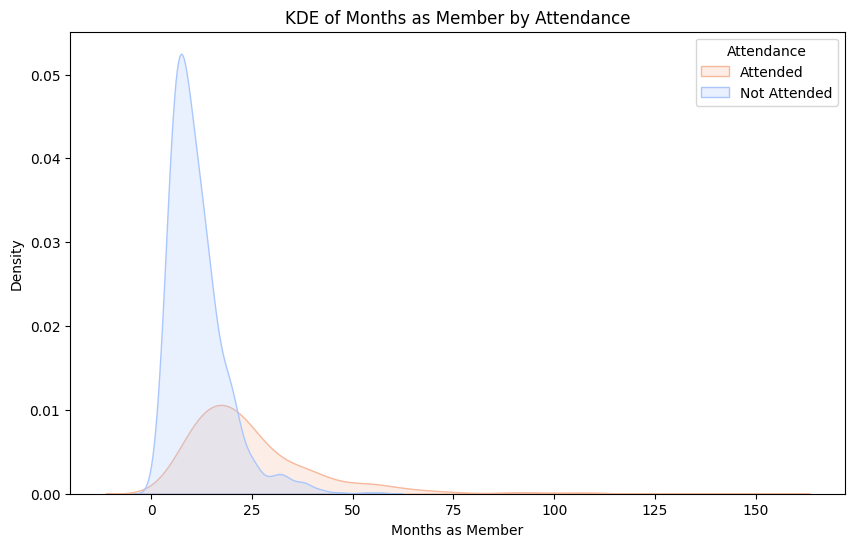

In [ ]:
# Plot Attendance Distribution by Months as Member using KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='months_as_member', hue='attended', palette='coolwarm', fill=True)
plt.xlabel('Months as Member')
plt.ylabel('Density')
plt.title('KDE of Months as Member by Attendance')
plt.legend(title='Attendance', labels=['Attended', 'Not Attended'], loc='upper right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = data_encoded.drop('attended', axis=1)
y = data_encoded['attended']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Random Forest Classifier in this example)
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
precision_score_rf = precision_score(y_test, y_pred)
recall_score_rf = recall_score(y_test, y_pred)
f1_score_rf = f1_score(y_test, y_pred)
print("RandomForestClassifier Accuracy:", accuracy_rf)
print("RandomForestClassifier Precision:", precision_score_rf)
print("RandomForestClassifier Recall:", recall_score_rf)
print("RandomForestClassifier F1 Score:", f1_score_rf)


RandomForestClassifier Accuracy: 0.7751677852348994
RandomForestClassifier Precision: 0.6923076923076923
RandomForestClassifier Recall: 0.4891304347826087
RandomForestClassifier F1 Score: 0.5732484076433121


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model (Logistic Regression)
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
logistic_regression.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logistic_regression.predict(X_test)

# Evaluate the model
accuracy_lr= accuracy_score(y_test, y_pred)
precision_score_lr = precision_score(y_test, y_pred)
recall_score_lr = recall_score(y_test, y_pred)
f1_score_lr = f1_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Precision:", precision_score_lr)
print("Logistic Regression Recall:", recall_score_lr)
print("Logistic Regression F1 Score:", f1_score_lr)


Logistic Regression Accuracy: 0.7651006711409396
Logistic Regression Precision: 0.7619047619047619
Logistic Regression Recall: 0.34782608695652173
Logistic Regression F1 Score: 0.4776119402985074


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the model (Decision Tree Classifier)
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy_dt= accuracy_score(y_test, y_pred)
precision_score_dt = precision_score(y_test, y_pred)
recall_score_dt = recall_score(y_test, y_pred)
f1_score_dt = f1_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Precision:", precision_score_dt)
print("Decision Tree Recall:", recall_score_dt)
print("Decision Tree F1 Score:", f1_score_dt)

Decision Tree Accuracy: 0.6912751677852349
Decision Tree Precision: 0.5
Decision Tree Recall: 0.4782608695652174
Decision Tree F1 Score: 0.4888888888888889


In [ ]:
# Load the dataset
data = pd.read_csv('problem2.csv')

# Encode categorical features
label_encoders = {}
for column in ['day_of_week', 'time', 'category']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Convert 'days_before' to numeric if needed
data['days_before'] = data['days_before'].str.replace(' days', '').astype(int)

# Fill missing values in the 'weight' column with the mean
data['weight'].fillna(data['weight'].mean(), inplace=True)

# Define features and target variable
X = data.drop(['booking_id', 'attended'], axis=1)
y = data['attended']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display feature importance
importance_df.reset_index(drop=True, inplace=True)
print(importance_df)


            Feature  Importance
0  months_as_member    0.403737
1            weight    0.349472
2       days_before    0.081165
3          category    0.079009
4       day_of_week    0.066046
5              time    0.020570


Insights and Recommendations:

Focus on Membership Engagement: Since the length of membership is the most significant predictor, enhancing member engagement and retention strategies could improve attendance.

Offerings Based on Weight: Understanding the role weight plays can help in designing personalized class offerings or marketing strategies that align with users' fitness goals.

Optimize Booking Lead Time: Encouraging users to book classes a specific number of days in advance might optimize attendance, leveraging the insight that "days before" has a moderate influence.

Analyze Class Popularity: Since the category also plays a role, understanding which classes are more likely to attract attendees could help in scheduling and resource allocation.

Weekly Patterns: Slight modifications to schedules based on the day of the week might help improve attendance rates by aligning with users' typical weekly routines.

By focusing on these insights, strategies can be developed to enhance user experience and increase attendance rates for bookings.